In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [71]:
def basis(n, b):
    B = np.zeros((n, n))
    for i in range(n):
        B[i, i] = b
        if i != n-1:
            B[i+1, i] = -1
    return B

def voronoi_relevant_vectors(n, b):
    B = basis(n, b)
    result = []
    for i in range(n):
        for j in range(i, n):
            v = np.zeros(n)
            for k in range(i, j+1):
                v[k] = 1
            result.append(B @ v)
            result.append(-B @ v)
    return result

def unit_vector(n, i):
    e = np.zeros(n)
    e[i] = 1
    return e

In [72]:
# defines the linear programming problem for facet i of the extended fundamental parallelepiped (B[-1,1]^n)
def problem(n, b, i, sign):
    B = basis(n, b)
    B_inv = np.linalg.inv(B)
    relvecs = voronoi_relevant_vectors(n, b)
    
    x = cp.Variable(n)
    # the objective is finding the maximum value in dimension i
    # among all points in the Voronoi cell
    objective = cp.Maximize(sign * B_inv @ x @ unit_vector(n, i) - 1)
    # constrain x to be inside the Voronoi cell
    constraints = list(map(lambda v: x @ v <= v @ v / 2, relvecs))
    prob = cp.Problem(objective=objective, constraints=constraints)
    return x, prob

In [128]:
def solve_problem(n, b):
    # i is the variable
    i_list = range(n)
    vals = []
    for i in i_list:
        x, prob = problem(n, b, i, 1)
        try:
            prob.solve()
        except:
            prob.solve(solver='SCS')
        vals.append(prob.value)
    plt.plot(i_list, vals)
    plt.xlabel('i')
    plt.ylabel('max objective')
    plt.show()
    return np.max(vals)

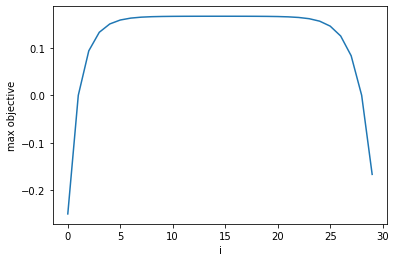

0.16664123469778835


In [125]:
# n = 30, b = 2, max value is about 1/6
solve_problem(30, 2)

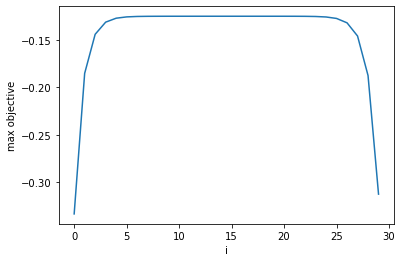

-0.1250000516440667

In [129]:
# n = 30, b = 3, max value is about -1/8
solve_problem(30, 3)

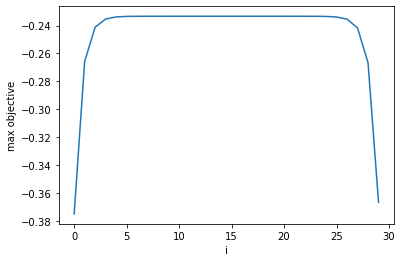

-0.23333334987546117

In [130]:
# n = 30, b = 4, max value is about -7/30
solve_problem(30, 4)

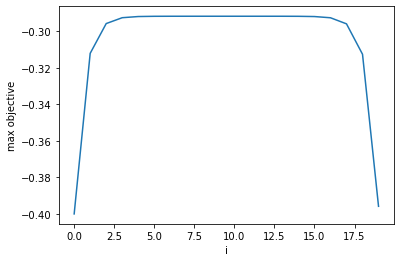

-0.2916667682953822

In [133]:
# n = 20, b = 5, max value is about -7/24
solve_problem(20, 5)

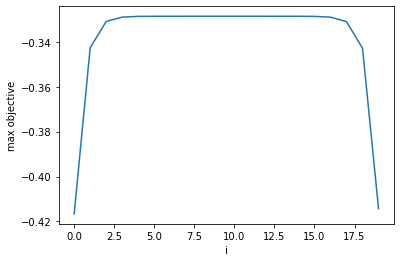

-0.32857153182276966

In [134]:
# n = 20, b = 6, max value is about -23/70
solve_problem(20, 6)

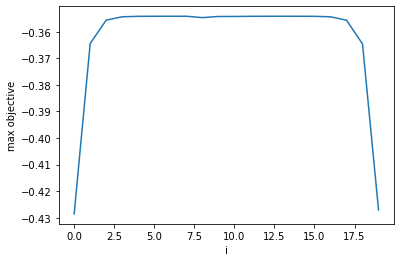

-0.3541668582422234

In [136]:
# n = 20, b = 7, max value is about -17/48
solve_problem(20, 7)

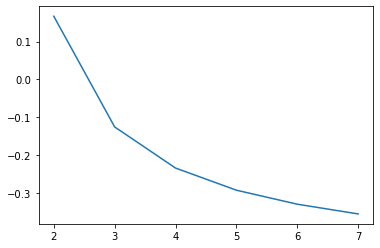

In [137]:
xs = range(2, 8)
ys = [0.16664123469778835, -0.1250000516440667, -0.23333334987546117, -0.2916667682953822, -0.32857153182276966, -0.3541668582422234]
plt.plot(xs, ys)
plt.show()